In [1]:
!pip install torch torchvision matplotlib

Defaulting to user installation because normal site-packages is not writeable
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/204.2 MB ? eta -:--:--
   ---------------------------------------- 1.0/204.2 MB 3.6 MB/s eta 0:00:57
   ---------------------------------------- 2.1/204.2 MB 4.1 MB/s eta 0:00:50
    --------------------------------------- 3.1/204.2 MB 4.3 MB/s eta 0:00:47
    --------------------------------------- 4.2/204.2 MB 4.6 MB/s eta 0:00:44
   - -------------------------------------- 5.5/204.2 MB 4.9 MB/s eta 0:00:41
   - -------------------------------------- 7.1/204.2 MB 5.3 MB/s eta 0:00:38
   - -------------------------------------- 8.7/204.2 MB 5.7 MB/s eta 0:00:35
   -- ------------------------------------- 

In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# 1. Создание датасета и DataLoader для MNIST


transform = transforms.Compose([
    transforms.ToTensor(),  
    transforms.Normalize((0.5,), (0.5,)) 
])


train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)


train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

100%|█████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:03<00:00, 3.16MB/s]
100%|██████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 206kB/s]
100%|█████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 2.33MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<?, ?B/s]


In [4]:
# 2. Определение архитектуры модели (MLP)

class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        
        self.fc1 = nn.Linear(28*28, 128)  
        self.fc2 = nn.Linear(128, 64) 
        self.fc3 = nn.Linear(64, 10)  
        
    def forward(self, x):
        x = x.view(-1, 28*28)  
        x = torch.relu(self.fc1(x))  
        x = torch.relu(self.fc2(x)) 
        x = self.fc3(x)  
        return x

In [5]:
# 3. Инициализация устройства (CUDA если доступно) и модели

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLPModel().to(device)  

In [6]:
# 4. Определение оптимизатора и функции потерь

optimizer = optim.Adam(model.parameters(), lr=0.001)  
criterion = nn.CrossEntropyLoss()  

In [7]:
# 5. Обучение модели

num_epochs = 5
for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  

        optimizer.zero_grad()  
        outputs = model(inputs)  
        loss = criterion(outputs, labels)  
        loss.backward()  
        optimizer.step()  

        running_loss += loss.item()  

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/5, Loss: 0.40880998864229806
Epoch 2/5, Loss: 0.20685162250675374
Epoch 3/5, Loss: 0.14650264843456398
Epoch 4/5, Loss: 0.12202316992429656
Epoch 5/5, Loss: 0.10270271232939446


In [8]:
# 6. Оценка модели на тестовых данных

model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1) 
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")

Accuracy: 96.72%


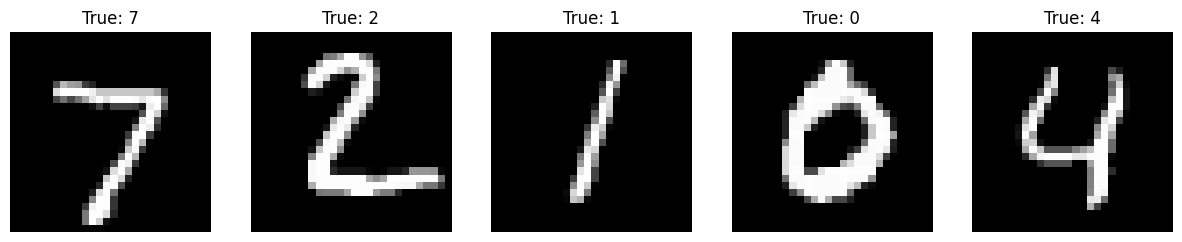

In [9]:
# 7. Визуализация нескольких примеров тестовых данных и их предсказаний

data_iter = iter(test_loader)
images, labels = next(data_iter)


images = images.cpu().numpy()
labels = labels.cpu().numpy()

fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {labels[i]}")
    ax.axis('off')

plt.show()